In [1]:
# KMP_Spot.ipynb - Cell 1: Record Demonstrations (Corrected)
import time
import numpy as np
import h5py
import pygame
import robosuite as suite
from robosuite.wrappers import VisualizationWrapper
import os

# --- Configuration ---
RECORD_DIR = "Demo"
os.makedirs(RECORD_DIR, exist_ok=True)
NUM_DEMOS = 4
CONTROL_FREQ = 20
STEP_TIME = 1.0 / CONTROL_FREQ
STEPS_TOTAL = 400  # 20 seconds of recording per demo
ENV_NAME = "Lift"
ROBOT_NAME = "Panda"
CONTROLLER_NAME = "OSC_POSITION"

# --- Initialize Pygame Joystick ---
pygame.init()
pygame.joystick.init()

if pygame.joystick.get_count() == 0:
    print("[WARNING] No joystick detected. Exiting.")
    pygame.quit()
    exit()

joystick = pygame.joystick.Joystick(0)
joystick.init()
print(f"[INFO] Using joystick: {joystick.get_name()}")

def get_xbox_action(scale=0.1):
    """
    Returns a 7D action vector: [dx, dy, dz, d_roll, d_pitch, d_yaw, gripper]
    """
    pygame.event.pump()
    # Position control
    dpos = np.zeros(3)
    dpos[0] = joystick.get_axis(0) * scale
    dpos[1] = -joystick.get_axis(1) * scale
    dpos[2] = -joystick.get_axis(4) * scale
    
    # Rotation control (set to zeros for position-only control)
    drot = np.zeros(3)

    # Gripper control
    grip = 1.0 if joystick.get_button(0) else -1.0
    
    return np.concatenate([dpos, drot, [grip]])

# --- Main Recording Loop ---
if __name__ == "__main__":
    for i in range(1, NUM_DEMOS + 1):
        RECORD_FILE = os.path.join(RECORD_DIR, f"Reach_demo{i}.hdf5")
        input(f"\n[INFO] Press Enter to start recording for Demo {i}...")

        demo_data = {"actions": [], "state": []}

        print("[INFO] Loading Robosuite environment...")
        try:
            # controller_config = suite.load_controller_config(default_controller=CONTROLLER_NAME)
            env = suite.make(
                env_name=ENV_NAME,
                robots=ROBOT_NAME,
                # controller_configs=controller_config,
                has_renderer=True,
                has_offscreen_renderer=False,
                ignore_done=True,
                use_camera_obs=False,
                horizon=STEPS_TOTAL,
                control_freq=CONTROL_FREQ,
            )
        except Exception as e:
            print(f"[ERROR] Failed to load environment: {e}")
            exit()

        print(f"[INFO] Environment Action Dimension: {env.action_dim}") # Should be 7

        env = VisualizationWrapper(env)
        print("[INFO] Resetting environment...")
        obs = env.reset()

        try:
            env.viewer.set_camera(camera_id=0)
        except Exception as e:
            print(f"[WARNING] Could not set camera: {e}")

        print("[INFO] Starting teleop loop... Perform the reaching motion.")
        for step in range(STEPS_TOTAL):
            start_time = time.time()
            action = get_xbox_action(scale=0.05)
            obs, _, _, _ = env.step(action)
            demo_data["actions"].append(action.copy())
            demo_data["state"].append(obs["robot0_eef_pos"])
            env.render()
            elapsed_time = time.time() - start_time
            sleep_time = max(0, STEP_TIME - elapsed_time)
            time.sleep(sleep_time)

        env.close()

        with h5py.File(RECORD_FILE, "w") as f:
            g = f.create_group("data/demo_0")
            g.create_dataset("actions", data=np.array(demo_data["actions"]))
            g.create_dataset("eef_pos", data=np.array(demo_data["state"]))
            f.attrs["env_name"] = ENV_NAME
            f.attrs["robot_name"] = ROBOT_NAME
            f.attrs["controller"] = CONTROLLER_NAME
        print(f"[SUCCESS] Demo {i} saved to {RECORD_FILE}")

    print("\n[INFO] All demonstrations recorded.")

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)


pygame 2.6.1 (SDL 2.28.4, Python 3.10.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)


WARNING! gymnasium is not installed. We will try to use openai gym instead.
[INFO] Using joystick: Xbox 360 Controller


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Loading Robosuite environment...


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Environment Action Dimension: 7
[INFO] Resetting environment...
[INFO] Starting teleop loop... Perform the reaching motion.
[SUCCESS] Demo 1 saved to Demo/Reach_demo1.hdf5


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Loading Robosuite environment...
[INFO] Environment Action Dimension: 7


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Resetting environment...
[INFO] Starting teleop loop... Perform the reaching motion.
[SUCCESS] Demo 2 saved to Demo/Reach_demo2.hdf5


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Loading Robosuite environment...


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Environment Action Dimension: 7
[INFO] Resetting environment...
[INFO] Starting teleop loop... Perform the reaching motion.
[SUCCESS] Demo 3 saved to Demo/Reach_demo3.hdf5


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Loading Robosuite environment...
[INFO] Environment Action Dimension: 7


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


[INFO] Resetting environment...
[INFO] Starting teleop loop... Perform the reaching motion.
[SUCCESS] Demo 4 saved to Demo/Reach_demo4.hdf5

[INFO] All demonstrations recorded.


In [2]:
# KMP_Spot.ipynb - Cell 2: Normalize and Smooth Demonstrations
import os
import h5py
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---
demo_dir = "Demo"
demo_files = [f"Reach_demo{i}.hdf5" for i in range(1, 5)]
normalized_length = 200
smoothing_window = 5
hdf5_output = "normalized_kmp_dataset.hdf5"

def moving_average(data, window_size):
    """Apply moving average filter across the time axis."""
    if data.ndim == 1:
        return np.convolve(data, np.ones(window_size) / window_size, mode='same')
    return np.array([moving_average(data[:, dim], window_size) for dim in range(data.shape[1])]).T

def interpolate_trajectory(data, target_len):
    """Interpolate trajectory to a target length."""
    original_len = len(data)
    t_orig = np.linspace(0, 1, original_len)
    t_new = np.linspace(0, 1, target_len)
    interpolated = np.zeros((target_len, data.shape[1]))
    for i in range(data.shape[1]):
        f = interp1d(t_orig, data[:, i], kind='linear', fill_value="extrapolate")
        interpolated[:, i] = f(t_new)
    return interpolated

# --- Main Processing ---
if __name__ == "__main__":
    all_actions = []
    all_eef_pos = []

    for fname in demo_files:
        path = os.path.join(demo_dir, fname)
        if not os.path.exists(path):
            print(f"[WARNING] File not found: {path}")
            continue

        with h5py.File(path, "r") as f:
            group = f["data/demo_0"]
            actions = np.array(group["actions"])
            eef_pos = np.array(group["eef_pos"])

            # Interpolate
            actions_interp = interpolate_trajectory(actions, normalized_length)
            eef_pos_interp = interpolate_trajectory(eef_pos, normalized_length)

            # Smooth
            actions_smooth = moving_average(actions_interp, smoothing_window)
            eef_smooth = moving_average(eef_pos_interp, smoothing_window)

            all_actions.append(actions_smooth)
            all_eef_pos.append(eef_smooth)

    if not all_eef_pos:
        print("[ERROR] No demonstration data was loaded. Exiting.")
    else:
        all_actions = np.stack(all_actions)
        all_eef_pos = np.stack(all_eef_pos)

        with h5py.File(hdf5_output, "w") as f:
            f.create_dataset("actions", data=all_actions)
            f.create_dataset("eef_pos", data=all_eef_pos)
        print(f"[HDF5] Saved normalized data to {hdf5_output}")
        print(f"[SUCCESS] Shapes: actions {all_actions.shape}, eef_pos {all_eef_pos.shape}")

[HDF5] Saved normalized data to normalized_kmp_dataset.hdf5
[SUCCESS] Shapes: actions (4, 200, 7), eef_pos (4, 200, 3)


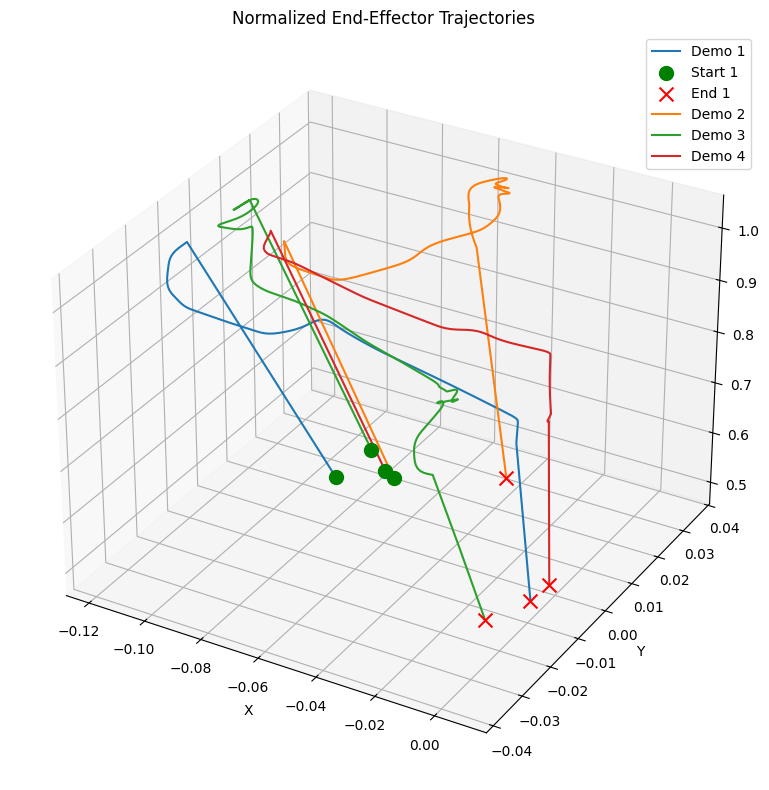

In [3]:
# KMP_Spot.ipynb - Cell 3: Visualize Processed Trajectories
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Path to your HDF5 file ---
HDF5_FILE = "normalized_kmp_dataset.hdf5"

# --- Load and Plot Data ---
if __name__ == "__main__":
    with h5py.File(HDF5_FILE, "r") as f:
        eef_pos = f["eef_pos"][:]  # shape: (num_demos, timesteps, 3)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(eef_pos.shape[0]):
        x, y, z = eef_pos[i, :, 0], eef_pos[i, :, 1], eef_pos[i, :, 2]
        ax.plot(x, y, z, label=f"Demo {i+1}")
        ax.scatter(x[0], y[0], z[0], marker='o', color='green', s=100, label=f'Start {i+1}' if i==0 else None)
        ax.scatter(x[-1], y[-1], z[-1], marker='x', color='red', s=100, label=f'End {i+1}' if i==0 else None)


    ax.set_title("Normalized End-Effector Trajectories")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.tight_layout()
    plt.show()

2025-06-29,04:38:29.753 INFO Loaded 4 demos with shape (4, 200, 3)
2025-06-29,04:38:29.754 INFO Fitting GMM...
2025-06-29,04:38:29.771 INFO GMM fit done.
2025-06-29,04:38:30.762 INFO GMR done.
2025-06-29,04:38:30.763 INFO Training KMP...
2025-06-29,04:38:36.732 INFO KMP fit done.
2025-06-29,04:38:41.659 INFO KMP predict done.
2025-06-29,04:38:41.659 INFO Generated KMP trajectory with shape: (3, 200)
2025-06-29,04:38:41.662 INFO Saved KMP model to trained_kmp_model.h5


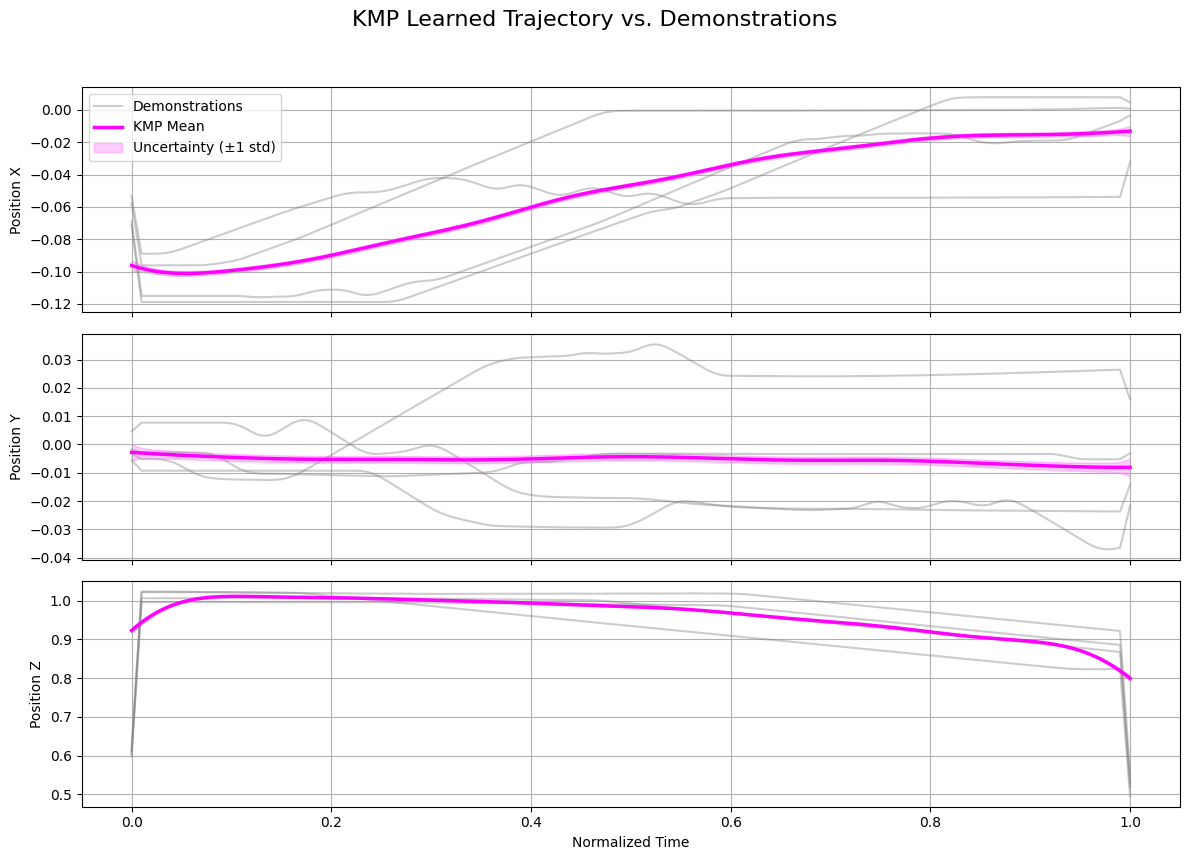

In [5]:
# KMP_Spot.ipynb - Cell 4: Train KMP Model (Corrected for FileNotFoundError)
import numpy as np
import h5py
import logging
import matplotlib.pyplot as plt
import os
from kmp.mixture import GaussianMixtureModel
from kmp.model import KMP

# --- Configuration ---
CONFIG = {
    "h5_path": "normalized_kmp_dataset.hdf5",
    "save_model_path": "trained_kmp_model.h5", # This path is now safe to use
    "gmm_components": 7,
    "diag_reg": 1e-3,
    "kmp_params": {
        "l": 0.4,
        "alpha": 1e-1,
        "sigma_f": 34,
        "time_driven_kernel": False
    }
}

logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] %(message)s')
logger = logging.getLogger("KMP-Train")

# --- Corrected Data Loading ---
def load_demos(h5_path):
    with h5py.File(h5_path, "r") as f:
        eef_pos = f["eef_pos"][:]
    # Demos should be a list of arrays, each of shape (dims, T), which is (3, 200)
    demos = [demo.T for demo in eef_pos]
    logger.info(f"Loaded {len(demos)} demos with shape {eef_pos.shape}")
    return demos

# --- KMP Training ---
def train_kmp(demos):
    T = demos[0].shape[1]
    time = np.linspace(0, 1, T).reshape(1, -1)

    X_list, Y_list = [], []
    for demo in demos:
        X_list.append(np.tile(time, (1, 1)))
        Y_list.append(demo)

    X = np.hstack(X_list)
    Y = np.hstack(Y_list)

    logger.info("Fitting GMM...")
    gmm = GaussianMixtureModel(
        n_components=CONFIG["gmm_components"],
        diag_reg_factor=CONFIG["diag_reg"]
    )
    gmm.fit(np.vstack([X, Y]).T)
    mu_gmr, sigma_gmr = gmm.predict(X)

    logger.info("Training KMP...")
    kmp = KMP(**CONFIG["kmp_params"])
    kmp.fit(X, mu_gmr, sigma_gmr)

    # Predict over the original time vector for plotting and simulation
    mu_kmp_pred, sigma_kmp_pred = kmp.predict(time)
    logger.info(f"Generated KMP trajectory with shape: {mu_kmp_pred.shape}")
    return time, mu_kmp_pred, sigma_kmp_pred, kmp

# --- Save Model (Corrected) ---
def save_model(path, time, mu, sigma, kmp_model):
    # Get the directory part of the path
    dir_path = os.path.dirname(path)
    
    # If a directory is specified in the path (e.g., "models/kmp.h5"), create it
    if dir_path and not os.path.exists(dir_path):
        os.makedirs(dir_path)
        logger.info(f"Created directory: {dir_path}")

    with h5py.File(path, "w") as f:
        f.create_dataset("mu_kmp", data=mu)
        f.create_dataset("sigma_kmp", data=sigma)
        f.create_dataset("time", data=time)
    logger.info(f"Saved KMP model to {path}")

# --- Plotting ---
def plot_trajectory(demos, time, mu_kmp, sigma_kmp):
    coords = ["X", "Y", "Z"]
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
    for i in range(3):
        ax = axes[i]
        for demo in demos:
            ax.plot(time.flatten(), demo[i], color="gray", alpha=0.4, label='Demonstrations' if 'Demonstrations' not in ax.get_legend_handles_labels()[1] else "")
        mu = mu_kmp[i]
        std_dev = np.sqrt(np.maximum(sigma_kmp[i, i, :], 0))
        ax.plot(time.flatten(), mu, color="magenta", label="KMP Mean", linewidth=2.5)
        ax.fill_between(time.flatten(), mu - std_dev, mu + std_dev, color="magenta", alpha=0.2, label="Uncertainty (±1 std)")
        ax.set_ylabel(f"Position {coords[i]}")
        ax.grid(True)
        if i == 0:
            ax.legend()
    axes[-1].set_xlabel("Normalized Time")
    plt.suptitle("KMP Learned Trajectory vs. Demonstrations", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    demos = load_demos(CONFIG["h5_path"])
    time_vec, mu_kmp_traj, sigma_kmp_traj, kmp_model = train_kmp(demos)
    save_model(CONFIG["save_model_path"], time_vec, mu_kmp_traj, sigma_kmp_traj, kmp_model)
    plot_trajectory(demos, time_vec, mu_kmp_traj, sigma_kmp_traj)

In [10]:
# KMP_Spot.ipynb - Cell 5: Run KMP Trajectory in Simulation (Corrected)
import h5py
import numpy as np
import time
import robosuite as suite
from robosuite.wrappers import VisualizationWrapper

# --- Configuration ---
MODEL_PATH = "trained_kmp_model.h5"
ENV_NAME = "Lift"
ROBOT_NAME = "Panda"
CONTROLLER_NAME = "OSC_POSITION"
CONTROL_FREQ = 20
KP = 10.0  # Proportional gain for the controller

# --- Load the learned trajectory ---
if __name__ == "__main__":
    try:
        with h5py.File(MODEL_PATH, "r") as f:
            mu_kmp = f["mu_kmp"][:]  # Shape (3, T)
            T = mu_kmp.shape[1]
            print(f"[INFO] Loaded KMP trajectory with {T} steps.")
    except Exception as e:
        print(f"[ERROR] Could not load the KMP model file: {MODEL_PATH}. Please ensure Cell 4 ran successfully.")
        print(e)
        exit()

    # --- Setup Environment ---
    print("[INFO] Setting up Robosuite environment for playback...")
    # controller_config = suite.load_controller_config(default_controller=CONTROLLER_NAME)
    env = suite.make(
        env_name=ENV_NAME,
        robots=ROBOT_NAME,
        # controller_configs=controller_config,
        has_renderer=True,
        has_offscreen_renderer=False,
        ignore_done=True,
        use_camera_obs=False,
        control_freq=CONTROL_FREQ,
        horizon=T + 50
    )
    env = VisualizationWrapper(env)
    obs = env.reset()
    env.viewer.set_camera(camera_id=0)

    # --- Execute Trajectory ---
    print("[INFO] Starting playback of the learned KMP trajectory...")
    start_pos = mu_kmp[:, 0]
    
    # Move to the start of the trajectory
    print("[INFO] Moving to the starting position of the trajectory...")
    start_time = time.time()
    while np.linalg.norm(obs["robot0_eef_pos"] - start_pos) > 0.01:
        if time.time() - start_time > 5: # Timeout
            print("[WARNING] Could not reach start position in time.")
            break
        
        # Construct 7D action
        dpos = KP * (start_pos - obs["robot0_eef_pos"])
        drot = np.zeros(3)
        grip_action = -1.0
        action = np.concatenate([dpos, drot, [grip_action]])
        
        obs, _, _, _ = env.step(action)
        env.render()

    # Execute the main trajectory
    for i in range(T):
        target_pos = mu_kmp[:, i]
        current_pos = obs["robot0_eef_pos"]
        
        # Proportional control for position
        dpos = KP * (target_pos - current_pos)
        drot = np.zeros(3)
        
        # Keep gripper closed
        grip_action = -1.0 
        
        # Construct 7D action
        action = np.concatenate([dpos, drot, [grip_action]])
        
        obs, _, _, _ = env.step(action)
        env.render()

    print("[DONE] Playback finished.")
    env.close()

[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
2025-06-29,04:39:36.421 INFO Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json


[INFO] Loaded KMP trajectory with 200 steps.
[INFO] Setting up Robosuite environment for playback...


[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
2025-06-29,04:39:36.627 INFO Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json
[robosuite INFO] Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)
2025-06-29,04:39:36.824 INFO Loading controller configuration from: /home/svarp/Desktop/Projects/KMP_robosuits/venv/lib/python3.10/site-packages/robosuite/controllers/config/robots/default_panda.json


[INFO] Starting playback of the learned KMP trajectory...
[INFO] Moving to the starting position of the trajectory...
[DONE] Playback finished.
